In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir())

# Any results you write to the current directory are saved as output.

['.git', '.ipynb_checkpoints', 'data_visualization.ipynb', 'README.md', 'app.py', 'troubleshoot.md', '.vscode', 'requirements.txt', 'Procfile', 'LICENSE', '__pycache__', 'test.csv', 'train.csv', 'runtime.txt', 'data_preparation.ipynb', 'model.pkl', 'model.py']


In [4]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
print('Train data shape', train_df.shape)
print(train_df.columns)

Train data shape (614, 13)
Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [5]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
print(f'Education: {train_df.Education.unique()}')
print(f'Dependents: {train_df.Dependents.unique()}')
print(f'Property_Area: {train_df.Property_Area.unique()}')
# credit: https://chrisalbon.com/python/data_wrangling/pandas_list_unique_values_in_column/

Education: ['Graduate' 'Not Graduate']
Dependents: ['0' '1' '2' '3+' nan]
Property_Area: ['Urban' 'Rural' 'Semiurban']


Now lets visualize each variable separately. Different types of variables are Categorical, ordinal and numerical.

**Categorical features**: These features have categories (Gender, Married, Self_Employed, Credit_History, Loan_Status).

**Ordinal features**: Variables in categorical features having some order involved (Dependents, Education, Property_Area).

**Numerical features**: These features have numerical values (ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term).

# Exploratory data analysis
## Univariate analysis


## 1. Loan status

In [ ]:
loan_status_count = train_df['Loan_Status'].value_counts()
print(loan_status_count, type(loan_status_count))
loan_status_count.plot.bar()

## 2. Categorical variable analysis (except Loan_Status)
### Gender, Married, Self_Employed, Credit_History

In [ ]:
plt.figure(1)
plt.subplot(221)
train_df['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender')

plt.subplot(222)
train_df['Married'].value_counts(normalize=True).plot.bar(title='Married')

plt.subplot(223)
train_df['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self Employed')

plt.subplot(224)
train_df['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit History')

## 3.  Independent Variable (Ordinal)
### Dependents, Education, Property_Area

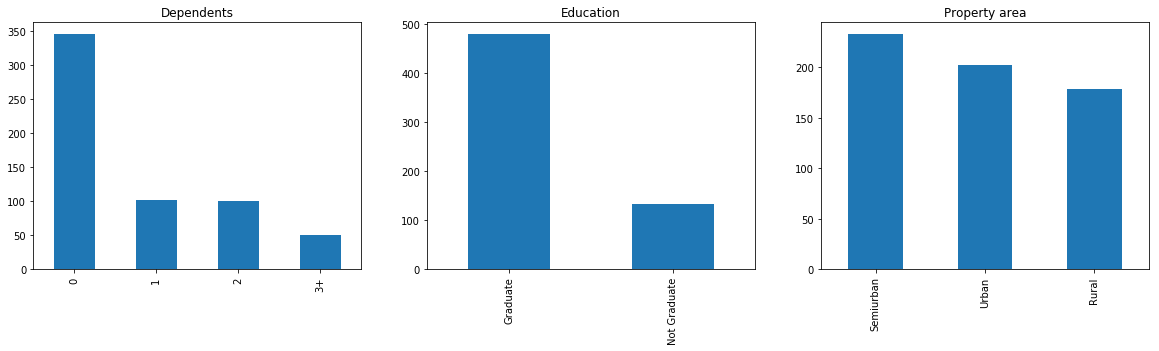

In [7]:
plt.figure(1)

plt.subplot(231)
train_df['Dependents'].value_counts().plot.bar(figsize=(20, 10), title='Dependents')

plt.subplot(232)
train_df['Education'].value_counts().plot.bar(title='Education')

plt.subplot(233)
train_df['Property_Area'].value_counts().plot.bar(title='Property area')

## Independent Variable (Numerical)

In [ ]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train_df['ApplicantIncome']);

plt.subplot(122)
train_df['ApplicantIncome'].plot.box(figsize=(16,5))

plt.show()

It can be inferred that most of the data in the distribution of applicant income is towards left which means it is not normally distributed. We will try to make it normal in later sections as algorithms works better if the data is normally distributed.

The boxplot confirms the presence of a lot of outliers/extreme values. This can be attributed to the income disparity in the society. Part of this can be driven by the fact that we are looking at people with different education levels. Let us segregate them by Education:

In [ ]:
train_df.boxplot(column='ApplicantIncome', by='Education')
# To remove the upper title in box plot
plt.suptitle('')

We can see that there are a higher number of graduates with very high incomes, which are appearing to be the outliers.

Let’s look at the Coapplicant income distribution.

In [ ]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train_df['CoapplicantIncome'])

plt.subplot(122)
train_df['CoapplicantIncome'].plot.box(figsize=(12,5))
plt.show()

In [ ]:
# train_df['Loan_Status'].value_counts(normalize=True).plot.bar()

We see a similar distribution as that of the applicant income. Majority of coapplicant’s income ranges from 0 to 5000. We also see a lot of outliers in the coapplicant income and it is not normally distributed.

Let’s look at the distribution of LoanAmount variable.

In [ ]:
plt.figure(1)
plt.subplot(121)

# distribution plots cannot handle NaN
df = train_df.dropna()
sns.distplot(df['LoanAmount'])

plt.subplot(122)
# Figsize = width * length
df['LoanAmount'].plot.box(figsize=(15,7))

In [ ]:
df.boxplot(column='CoapplicantIncome', by='Education')
plt.suptitle('')

## Bivariate Analysis

## Categorical Independent Variable vs Target Variable

In [ ]:
# Compute a simple cross-tabulation of two (or more) factors. 
# By default computes a frequency table of the factors
Gender = pd.crosstab(train_df['Gender'],train_df['Loan_Status'])
# print(Gender)

print(Gender.div(Gender.sum(axis=1).astype(float), axis=0))
Gender.div(Gender.sum(axis=1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

In [ ]:
Married = pd.crosstab(train_df['Married'],train_df['Loan_Status'])
Dependents = pd.crosstab(train_df['Dependents'],train_df['Loan_Status'])
Education=pd.crosstab(train_df['Education'],train_df['Loan_Status'])
Self_Employed = pd.crosstab(train_df['Self_Employed'],train_df['Loan_Status'])

Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.show()

Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

- Proportion of married applicants is higher for the approved loans.
- Distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status.
- There is nothing significant we can infer from Self_Employed vs Loan_Status plot.

Now we will look at the relationship between remaining categorical independent variables and Loan_Status.

In [ ]:
Credit_History=pd.crosstab(train_df['Credit_History'],train_df['Loan_Status'])
Property_Area=pd.crosstab(train_df['Property_Area'],train_df['Loan_Status'])

Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.show()

## Numerical Independent Variable vs Target Variable

In [ ]:
train_df.groupby('Loan_Status').mean().plot.bar()

In [ ]:
train_df.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

We don’t see any change in the mean income. So, let’s make bins for the applicant income variable based on the values in it and analyze the corresponding loan status for each bin.

In [ ]:
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High', 'Very high']
train_df['Income_bin'] = pd.cut(train_df['ApplicantIncome'],bins,labels=group)


In [ ]:
Income_bin=pd.crosstab(train_df['Income_bin'],train_df['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('ApplicantIncome')
P = plt.ylabel('Percentage')

It can be inferred that Applicant income does not affect the chances of loan approval which contradicts our hypothesis in which we assumed that if the applicant income is high the chances of loan approval will also be high.

We will analyze the coapplicant income and loan amount variable in similar manner.

In [ ]:
bins=[0,1000,3000,42000]
group=['Low','Average','High']
train_df['Coapplicant_Income_bin'] = pd.cut(train_df['CoapplicantIncome'],bins,labels=group)

Coapplicant_Income_bin=pd.crosstab(train_df['Coapplicant_Income_bin'], train_df['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('CoapplicantIncome')
P = plt.ylabel('Percentage')

It shows that if coapplicant’s income is less the chances of loan approval are high. But this does not look right. The possible reason behind this may be that most of the applicants don’t have any coapplicant so the coapplicant income for such applicants is 0 and hence the loan approval is not dependent on it. 
So we can make a new variable in which we will combine the applicant’s and coapplicant’s income to visualize the combined effect of income on loan approval.
Let us combine the Applicant Income and Coapplicant Income and see the combined effect of Total Income on the Loan_Status.

In [ ]:
train_df['Total_Income']=train_df['ApplicantIncome']+train_df['CoapplicantIncome']

In [ ]:
bins = [0,2500,4000,6000,81000]
group=['Low','Average','High', 'Very high']
train_df['Total_Income_bin'] = pd.cut(train_df['Total_Income'],bins,labels=group)

Total_Income_bin = pd.crosstab(train_df['Total_Income_bin'], train_df['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Total_Income')
P = plt.ylabel('Percentage')

Let’s visualize the Loan amount variable.

In [ ]:
bins=[0,100,200,700]
group=['Low','Average','High']
train_df['LoanAmount_bin'] = pd.cut(train_df['LoanAmount'], bins, labels=group)

LoanAmount_bin=pd.crosstab(train_df['LoanAmount_bin'], train_df['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('LoanAmount')
P = plt.ylabel('Percentage')

It can be seen that the proportion of approved loans is higher for Low and Average Loan Amount as compared to that of High Loan Amount which supports our hypothesis in which we considered that the chances of loan approval will be high when the loan amount is less.

Let’s drop the bins which we created for the exploration part. We will change the 3+ in dependents variable to 3 to make it a numerical variable.We will also convert the target variable’s categories into 0 and 1 so that we can find its correlation with numerical variables. One more reason to do so is few models like logistic regression takes only numeric values as input. We will replace N with 0 and Y with 1.

In [ ]:
train_df = train_df.drop(['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis=1)

In [ ]:
train_df['Dependents'].replace('3+', 3,inplace=True)
test_df['Dependents'].replace('3+', 3,inplace=True)
train_df['Loan_Status'].replace('N', 0,inplace=True)
train_df['Loan_Status'].replace('Y', 1,inplace=True)

Now lets look at the correlation between all the numerical variables. We will use the heat map to visualize the correlation.

Heatmaps visualize data through variations in coloring. The variables with darker color means their correlation is more.

In [ ]:
matrix = train_df.corr()
print(matrix)
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");